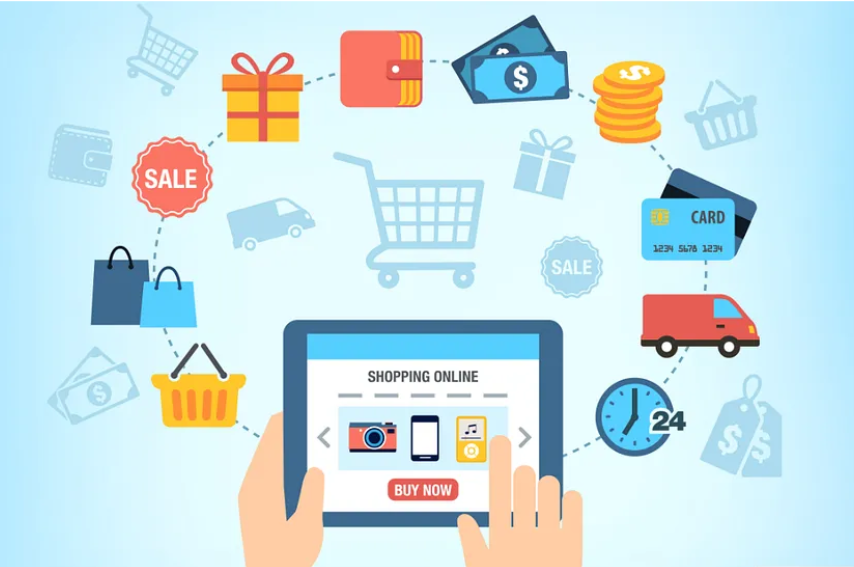

#Context

To conduct a thorough Exploratory Data Analysis to analyze user behavior across different page categories, engagement time, and other features. Gain insights into factors influencing purchase decisions and identify areas for optimization.

#Know Your Data

In [58]:
import pandas as pd
import numpy as np

In [59]:
dfs=pd.read_csv('shopping.csv')

In [60]:
dfs

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [61]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Observations:

- There are 12330 rows and 18 columns
- No Null Values

#Data Pre-processing

- Check Duplicates
- Check Outliers and Treatment
- Change Data Types of Column if needed
- Data Cleaning


####**Checking of Duplicates and Treatment**

In [62]:
df=dfs.copy()

In [63]:
df.duplicated().any()

True

In [64]:
# Sort the DataFrame by all columns to group duplicates together
df_sorted = df.sort_values(by=list(df.columns))

# Identify duplicates, including the first occurrences
duplicates_sorted = df_sorted[df_sorted.duplicated(keep=False)]

# Display the duplicates in order
duplicates_sorted


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8247,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,1,Returning_Visitor,True,False
10751,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,1,Returning_Visitor,True,False
11658,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,1,Returning_Visitor,True,False
8882,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,May,2,2,2,3,Returning_Visitor,False,False
4552,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,May,2,2,2,3,Returning_Visitor,False,False
5199,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,May,2,2,2,3,Returning_Visitor,False,False
9715,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Nov,1,1,1,1,Returning_Visitor,False,False


We can observe many instances where rows are exactly duplicated. Here, duplicates can represent data of individual customers having incidentally same details.

Currently, removing duplicates keeping one instance with following reasoning:

- Maintain Representation: By keeping the one instance, it is ensured that each type is represented in the dataset, which can be important for understanding the data and avoiding bias.

- Avoid Skew: Removing duplicates helps to prevent skewing the analysis, as duplicates can distort statistical measures and modeling.

- Simplify Analysis: It reduces the complexity of the dataset without losing critical information, making it easier to perform EDA and draw meaningful insights.



In [65]:
df.drop_duplicates(keep='first',inplace=True)

In [66]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Observation:

After removing duplicates we are left with 12205 rows

####**Check Unique Values for Each Feature and Convert Data type if needed**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [68]:
# Non-numeric columns
cols1 = df.select_dtypes(include=['object','bool']).columns
cols1

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [69]:
for _ in cols1:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df[_].value_counts()}')
    print()
    print('-'*120)


Total Unique Values in Month column are :- 10
Value counts in Month column are :-
 Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in VisitorType column are :- 3
Value counts in VisitorType column are :-
 VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in Weekend column are :- 2
Value counts in Weekend column are :-
 Weekend
False    9346
True     2859
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in R

In [70]:
# Numeric columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [71]:
for _ in num_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in Administrative column are :- 27
Value counts in Administrative column are :-
 Administrative
0     0.462351
1     0.110938
2     0.091274
3     0.074969
4     0.062679
5     0.047112
6     0.035395
7     0.027694
8     0.023515
9     0.018435
10    0.012536
11    0.008603
12    0.007046
13    0.004588
14    0.003605
15    0.003113
16    0.001966
17    0.001311
18    0.000983
19    0.000492
24    0.000328
22    0.000328
23    0.000246
21    0.000164
20    0.000164
27    0.000082
26    0.000082
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in Administrative_Duration column are :- 3335
Value counts in Administrative_Duration column are :-
 Administrative_Duration
0.000000      0.473413
4.000000      0.004588
5.000000      0.004342
7.000000      0.003687
11.000000     0.003441
                ...   
68.014286     0.000082
362.300000    0.

There are a few columns which are categorical in nature and hence will convert them to category data type.

In [72]:
cols2= ['SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for _ in cols2:
    df[_] = df[_].astype('category')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  category
 10  Month                    12205 non-null  object  
 11  OperatingSystems         12205 non-null  category
 12  Browser                  12205 non-null  category
 13  Region                   12205 non-null  category
 14  TrafficType

#### **Checking Outliers and Treatment**

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

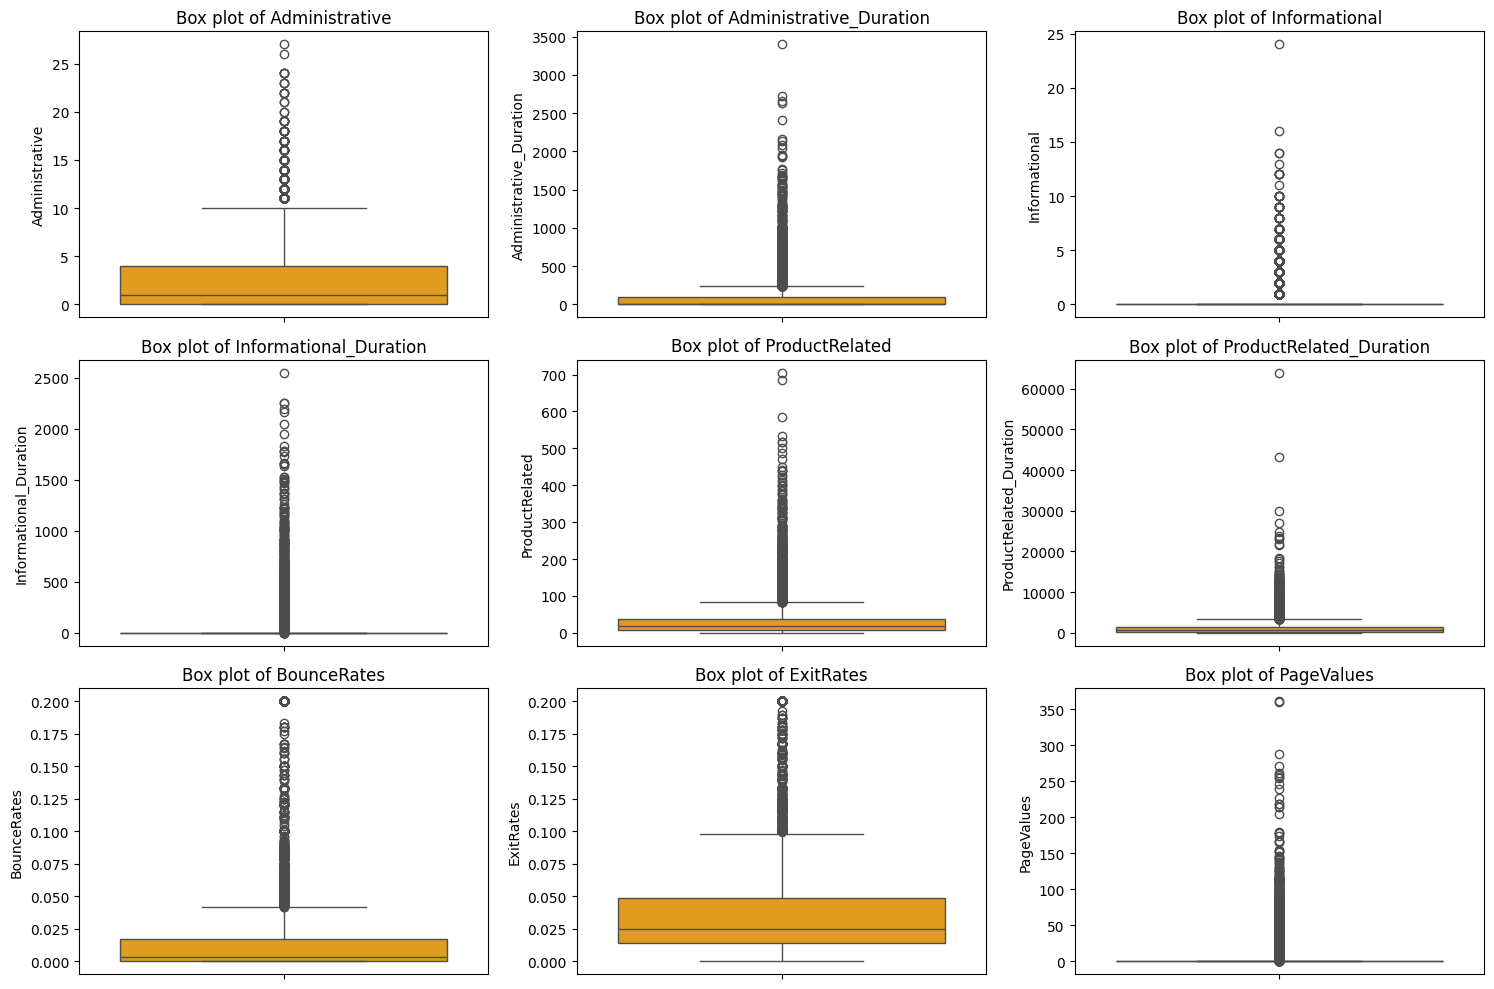

In [75]:
# Assuming df is your DataFrame
# Filter numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size based on the number of numerical columns
    sns.boxplot(y=df[column],color='orange')
    plt.title(f'Box plot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()


Using Capping method for Outliers treatment to retain all the data points but reduce the influence of extreme outliers and not drastically tranforming the entire distribution

In [76]:
# Capping using the 99th percentiles
for column in numerical_columns:
    lower_limit = df[column].quantile(0.0) #since there are no negative values
    upper_limit = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)


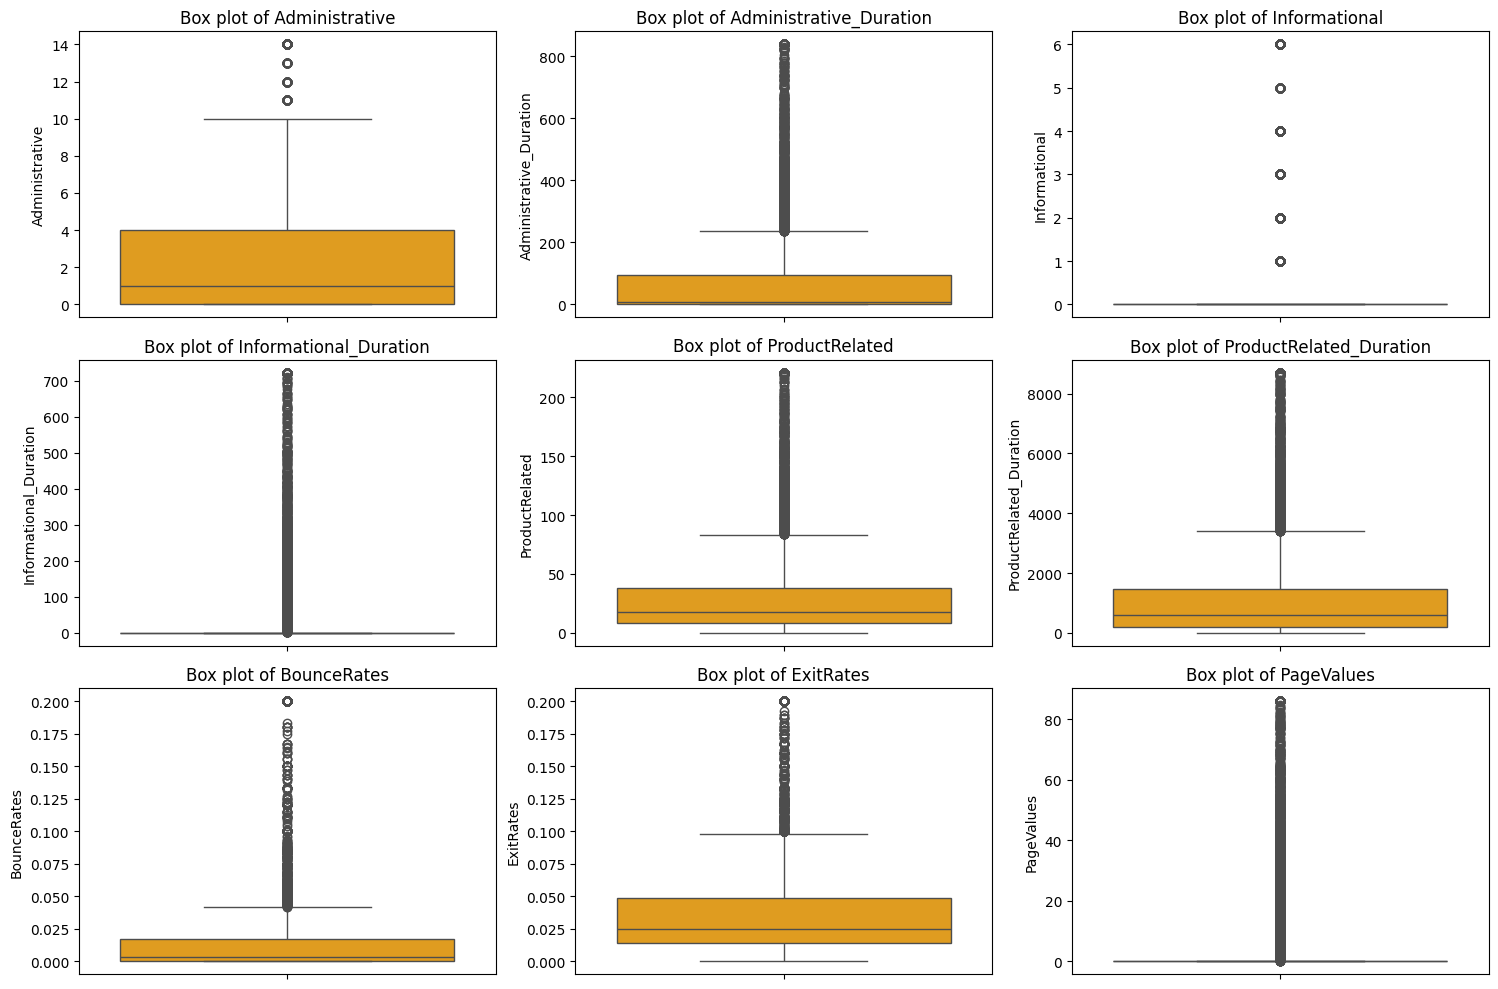

In [77]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size based on the number of numerical columns
    sns.boxplot(y=df[column],color='orange')
    plt.title(f'Box plot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()


#Analysis and Distribution of Variables

- UniVariate Analysis
- Class Distribution
- Impact of each Feature on Revenue
- Statistical Summary

#### **UniVariate Analysis / Class Distribution**

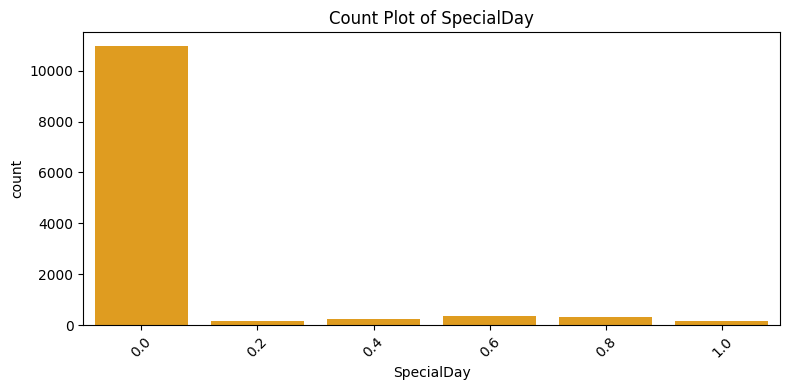

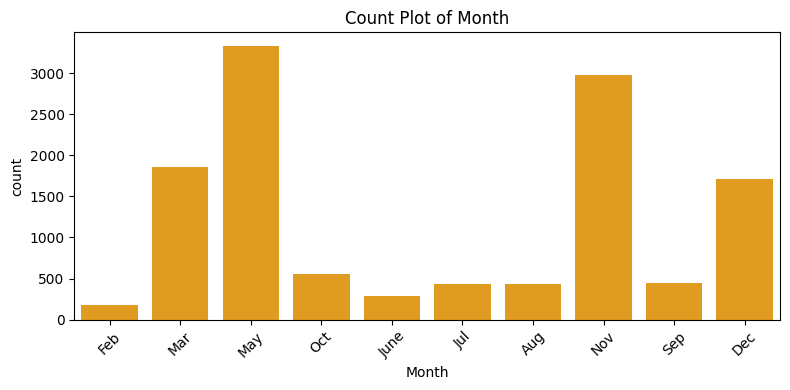

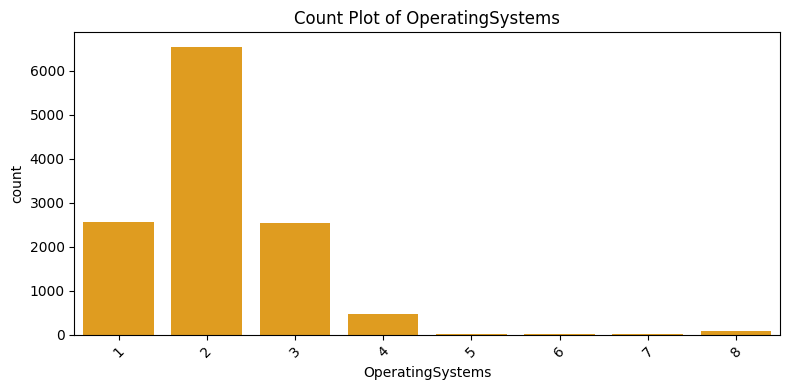

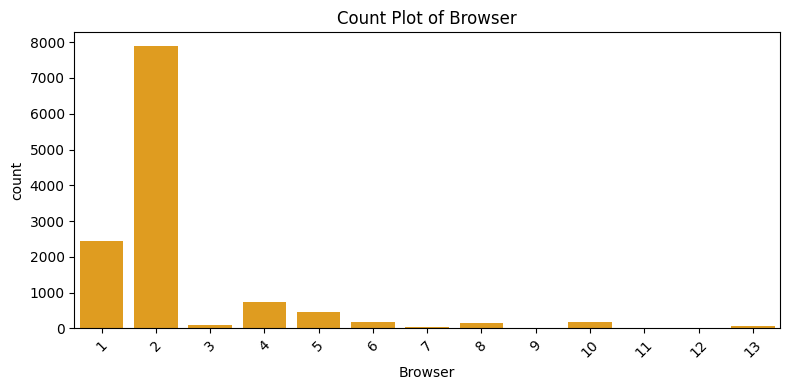

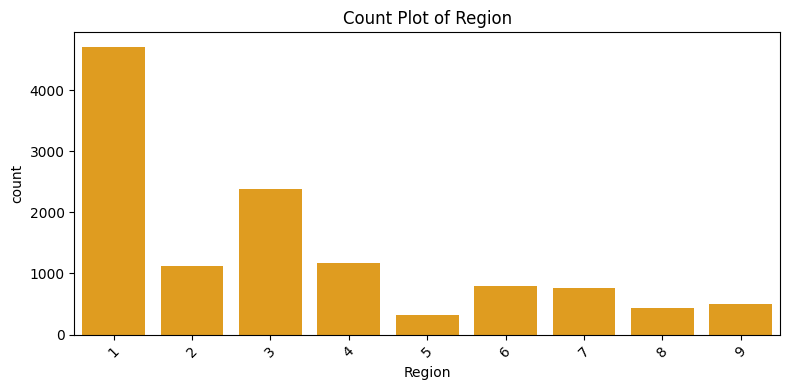

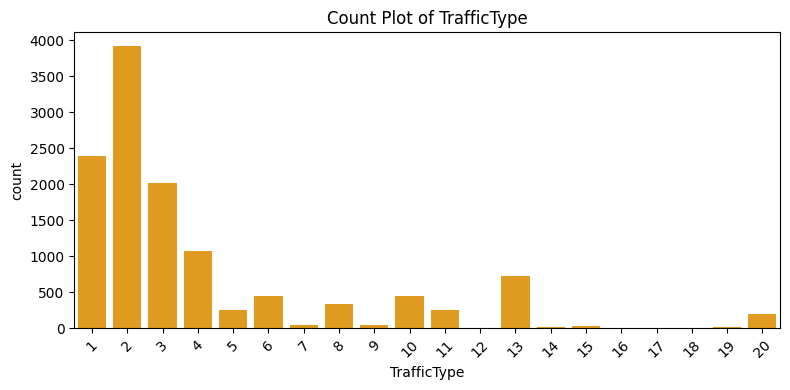

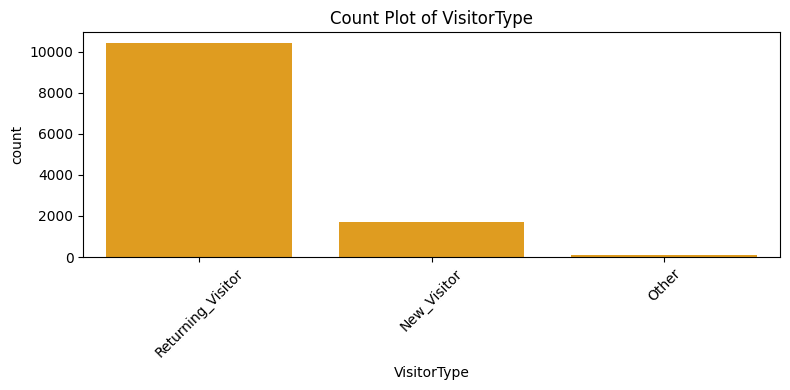

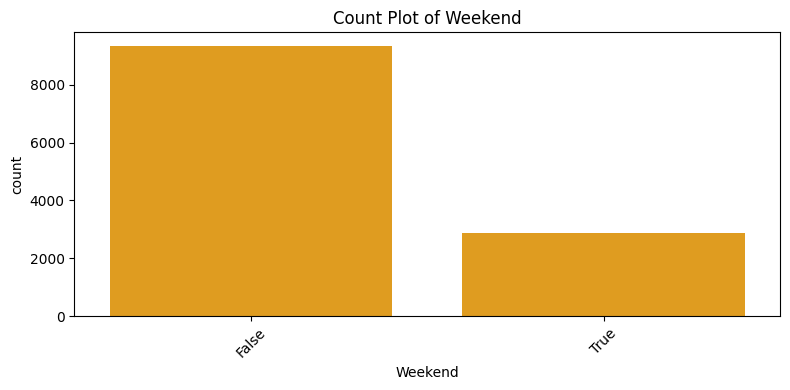

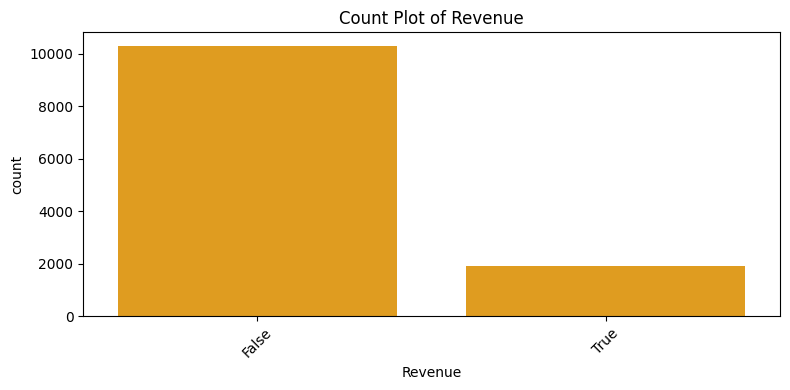

In [78]:
non_numerical_columns = df.select_dtypes(include=['category', 'object', 'bool']).columns

# Plot count plots for each non-numerical column
for column in non_numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Observations:

* SpecialDay 0.0 is the maximum with almost all entries with 0.0 and rest are negligible
* Month 'May' has got most of visitors followed by 'Nov' and 'March'
* Operating system 2 is the highest followed by 1 and 3
* Browser 2 has the maximum count followed by 1 and 4
* Most of the visitors are from Region 1 followed by 3 and 4
* Traffic type 2 has got maximum entries followed by 1 and 3
* Returning visitors are the highest with count above 10k followed by New_Visitor hardly 2k and negligible 'Other'
* Aboutt 70% sessions have occured on weekdays, not on weekends
* Almost 20% of the visitors completed the purchase

####**Impact of Categorical Features on Revenue**

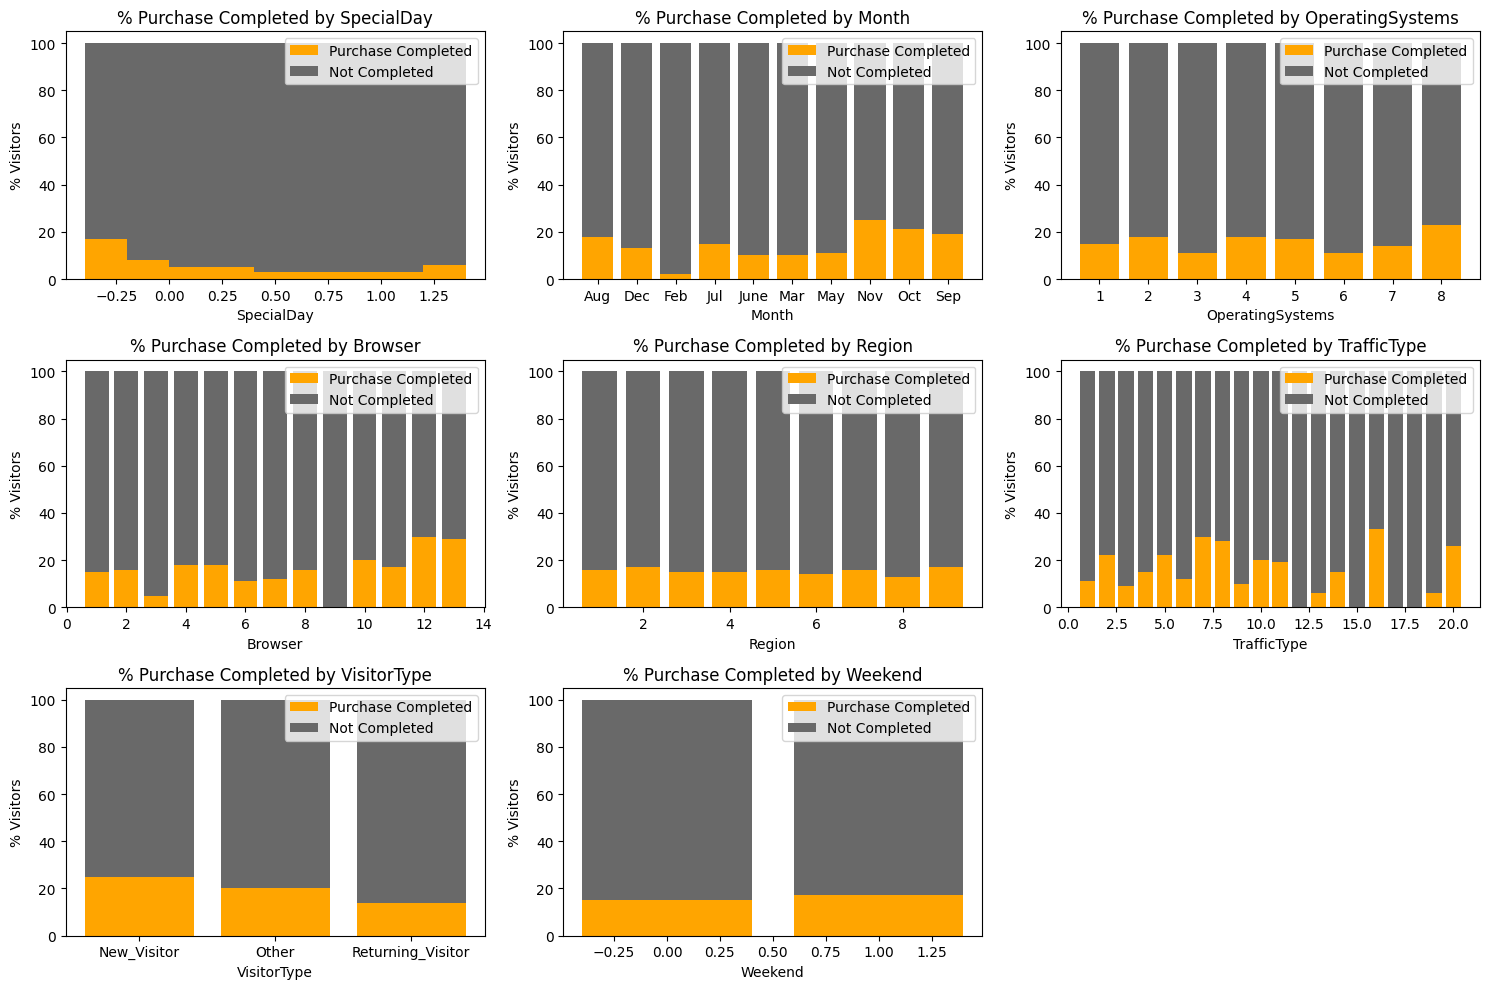

In [79]:
non_numerical_columns= non_numerical_columns.drop('Revenue')
plt.figure(figsize=(15,10))
i=1
for col in non_numerical_columns:
    ax = plt.subplot(3, 3, i)

    data = df.pivot_table(index=col, columns='Revenue', aggfunc='size')

    # Convert counts to percentages
    data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
    data.reset_index(inplace=True)

    # Plotting the bars
    plt.bar(data[col], data[1], color='orange',label='Completed Purchase')
    plt.bar(data[col], data[0], color='dimgrey', bottom=data[1],label='Not Completed')

    # Labeling and titles
    plt.xlabel(f'{col}')
    plt.ylabel('% Visitors')
    plt.title(f'% Purchase Completed by {col}')
    plt.legend(['Purchase Completed', 'Not Completed'])

    i += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Observations:

* % Visitors who completed the purchase on SpecialDay 0.0 are the highest
* November month has observed highest % i.e 30% of the visitors completed purchase followed by about 25% in October and about 20% in Spetember
* Almost 25% of the visitors using Operating system 8 completed the purchase followed by almost 20% using 2 and 4
* 30% of the visitors using Browser 12 and 13 are the ones completing purchase followed by 20% using 10 and 4 and 5
* There is no significant effect of Region on completion of purchase
* TrafficType 16 has highest number of visitors almost 35% completing the purchase followed by almost 30% visitors of 7 and 8
* 25% of the New Visitors complete the purchase followed by 20% of Other and 15% of Returning Visitors
* There is no significant effect of Weekend on purchase completion. With completed payments slightly higher on weekends.



####**Analysing Numerical Features and impact on Revenue**

In [80]:
import warnings

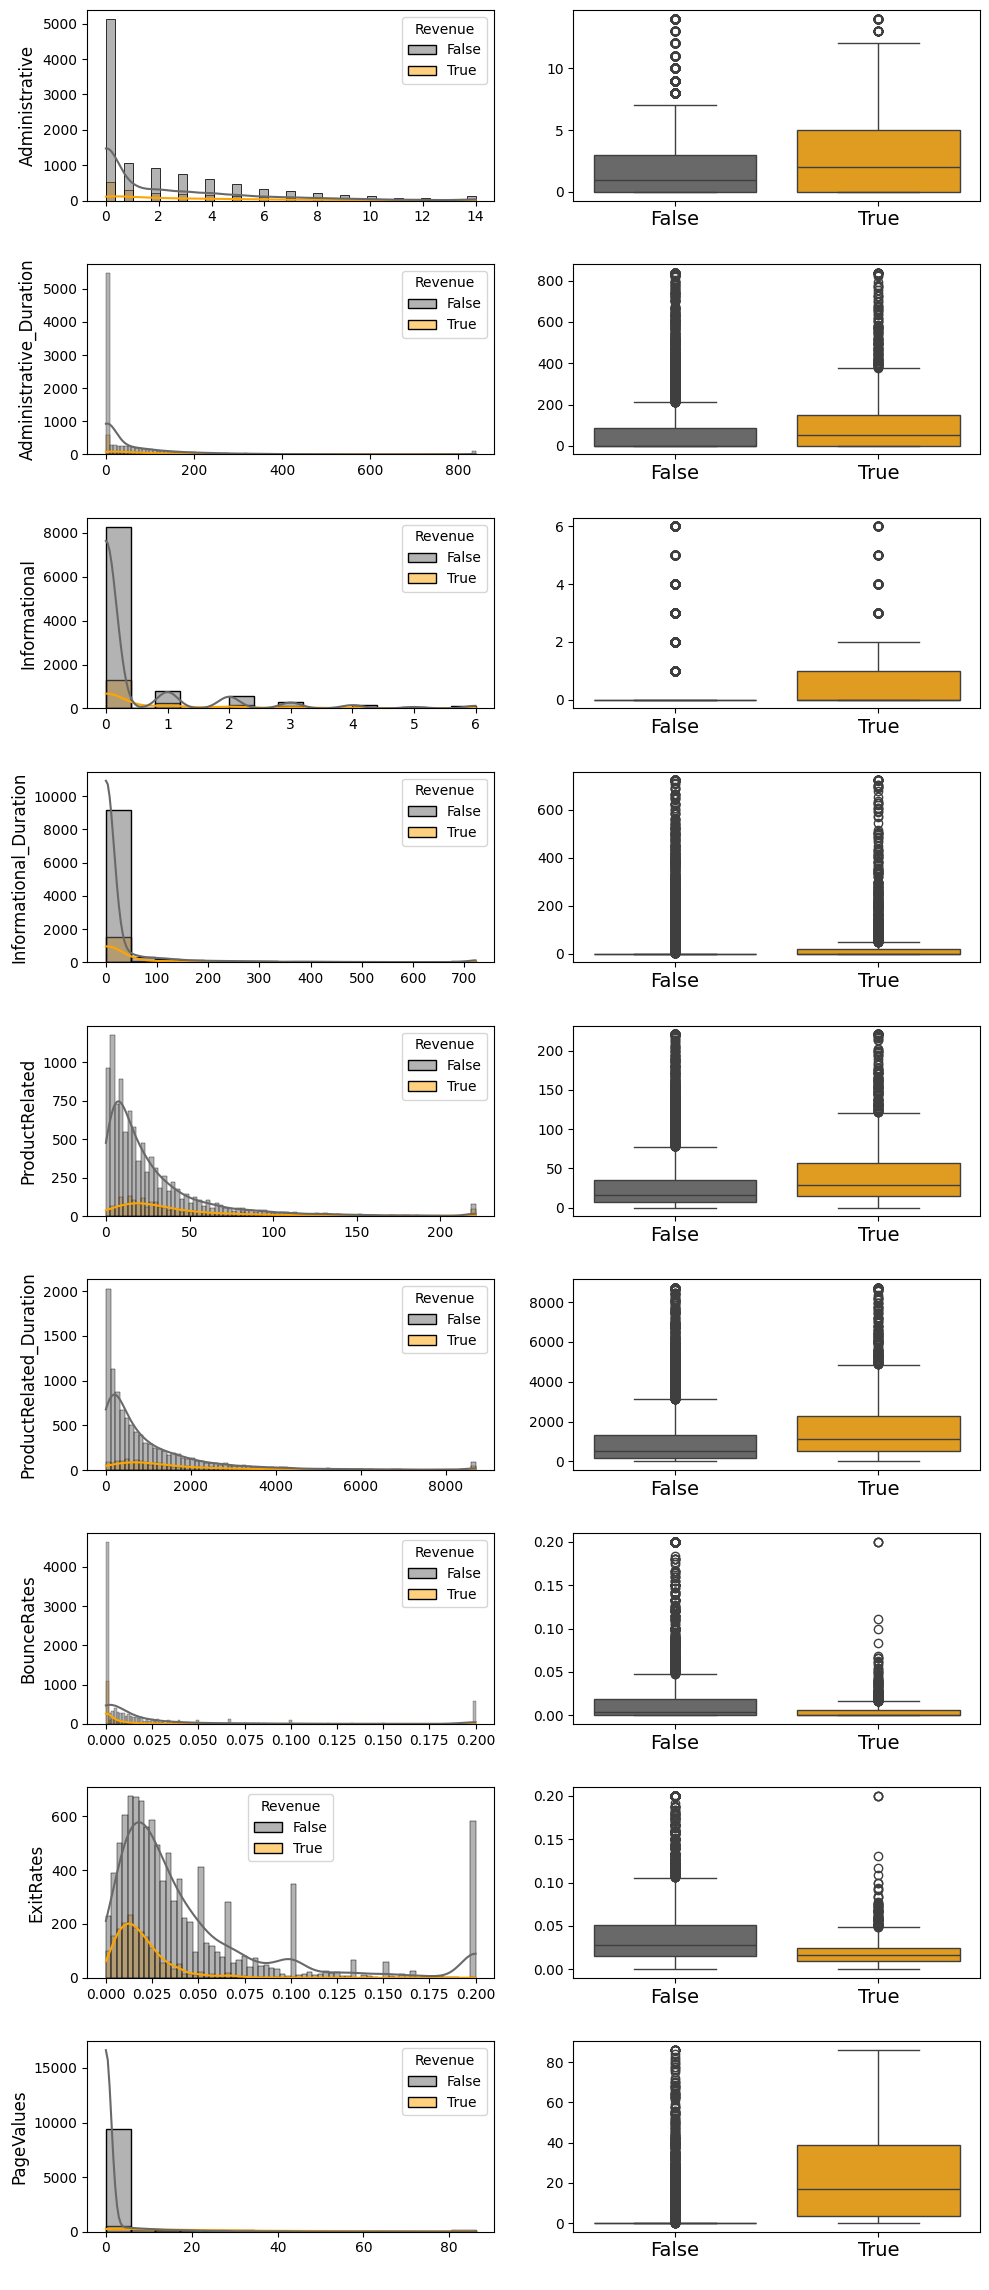

In [81]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(9,2,figsize=(10,23))
i=0
color_dict = {0: 'dimgrey', 1: 'orange'}
for col in numerical_columns:
    sns.boxplot(data=df, y=col, x='Revenue', ax=ax[i,1],
               palette=('dimgrey','orange'))
    sns.histplot(data=df, x=col, hue='Revenue', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

Observations:

* Maximum visitors did not visit any Administrative page, of which 10% of the visitors completed payment. As the number of administrative page are increasing the number of visitors are decreasing.  The fact that True Revenue has fewer instances but a wider range (larger IQR) suggests that when Revenue is True, the values of the numerical variable tend to be more varied, with a broader range of values. This could mean that while fewer customers (or instances) generate revenue, those that do may exhibit a broader spectrum of behaviors or characteristics.
* Similar obervation as above for Administrative Duration
* About 12% of the visitors completed the payment of the ones who did not visit any Informational page. As the number of such pages are increasing, the number of visits are decreasing. The greater spread in the box plot for True Revenue indicates higher variability among those instances where revenue is generated.
* Similar observation for Informational Duration i.e amount of time spent on these category of pages
* Maximum visitors have visited about 20 Product related pages of which about 17% have completed payment. Number of visitors reduces as the number of pages increase or decreases. A wider range or large IQR for when Revenue is True indicate that while fewer customers (or instances) generate revenue, those that do may exhibit a broader spectrum of behaviors or characteristics.
* Similar obervation or characteristics are observed for Product page duration
* Maximum visitors have got 0 Bounce Rate of which about 20% of the visitors completed payment
* Most of the visitors have shown an exit rate of about 1.25% of which about 27% of the visitors have completed payment
* The majority of pages (77.6%) have a PageValues of 0.0, indicating that these pages were part of sessions that did not lead to a conversion (purchase). The remaining values in PageValues, like 53.988, 42.293068, and 59.988, occur with very low frequency. These values represent pages that were part of sessions leading to conversions, with each value reflecting the contribution of the page to the revenue generated.

####Statistical Summary

In [82]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12205.0,NaN,NaN,NaN,2.309218,3.199232,0.0,0.0,1.0,4.0,14.0
Administrative_Duration,12205.0,NaN,NaN,NaN,77.021957,142.728817,0.0,0.0,9.0,94.7,838.704889
Informational,12205.0,NaN,NaN,NaN,0.490455,1.15428,0.0,0.0,0.0,0.0,6.0
Informational_Duration,12205.0,NaN,NaN,NaN,30.696256,105.26859,0.0,0.0,0.0,0.0,722.3792
ProductRelated,12205.0,NaN,NaN,NaN,31.127735,38.331027,0.0,8.0,18.0,38.0,221.0
ProductRelated_Duration,12205.0,NaN,NaN,NaN,1164.58894,1555.729802,0.0,193.0,608.942857,1477.154762,8704.271573
BounceRates,12205.0,NaN,NaN,NaN,0.02037,0.045255,0.0,0.0,0.002899,0.016667,0.2
ExitRates,12205.0,NaN,NaN,NaN,0.041466,0.046163,0.0,0.014231,0.025,0.048529,0.2
PageValues,12205.0,NaN,NaN,NaN,5.496011,14.942396,0.0,0.0,0.0,0.0,86.108689
SpecialDay,12205.0,6.0,0.0,10956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

* Average of 2.3 Administrative pages visited with maximum of 14
* Average Time spent on Administrative pages is 77 with maximum of 839
* Average of 0.5 Informational pages visited with maximum of 6
* Average Time spent on Informational pages is 31 and maximum is 722
* Average of 31 product related pages visited and maximum is 221. And average time spent is 1164 and maximum is 8704
* Average Bounce Rate is 0.02 and maximum is 0.2
* Average Exit Rate is 0.04 and maximum is 0.2
* Average PageValue is 5.5 and maximum is 86

# Correlation Analysis

In [83]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

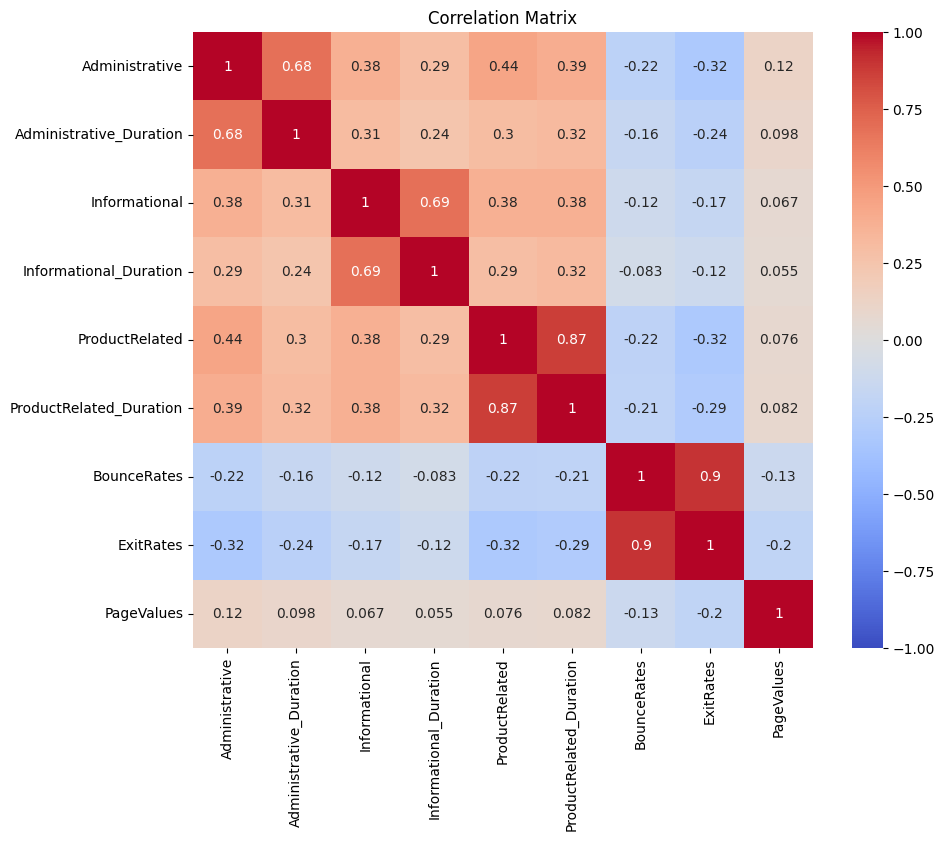

In [84]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Observations:

* Bounce Rates and Exit Rates show high positive correlation at 0.9
* Informational show positive correlation with ProductRelated and Administrative. Similarly for Duration of each of these types of pages
* PageValues show slight positive correlation to Administrative, ProductRelated and Informational and also to Administrative_Duration, Informational_Duration and ProductRelated_Duration

#Summarize page views, durations, and bounce/exit rates for each page category.

In [85]:
categories = {
    'Administrative': {
        'views': 'Administrative',
        'duration': 'Administrative_Duration'
    },
    'Informational': {
        'views': 'Informational',
        'duration': 'Informational_Duration'
    },
    'ProductRelated': {
        'views': 'ProductRelated',
        'duration': 'ProductRelated_Duration'
    }
}

# Initialize lists to store results
category_names = []
total_page_views = []
average_durations = []
average_bounce_rates = []
average_exit_rates = []

# Iterate over each category and calculate the required metrics
for category, columns in categories.items():
    views_col = columns['views']
    duration_col = columns['duration']

    # Total Page Views
    total_views = df[views_col].sum()

    # Average Duration
    avg_duration = df[duration_col].mean()

    # Average Bounce Rate
    avg_bounce_rate = df[df[views_col] > 0]['BounceRates'].mean()

    # Average Exit Rate
    avg_exit_rate = df[df[views_col] > 0]['ExitRates'].mean()

    # Append results
    category_names.append(category)
    total_page_views.append(total_views)
    average_durations.append(avg_duration)
    average_bounce_rates.append(avg_bounce_rate)
    average_exit_rates.append(avg_exit_rate)

# Create a summary DataFrame
summary = pd.DataFrame({
    'Category': category_names,
    'Total_Page_Views': total_page_views,
    'Average_Duration': average_durations,
    'Average_Bounce_Rate': average_bounce_rates,
    'Average_Exit_Rate': average_exit_rates
})

In [86]:
summary

,Category,Total_Page_Views,Average_Duration,Average_Bounce_Rate,Average_Exit_Rate
0,Administrative,28184,77.021957,0.007627,0.023467
1,Informational,5986,30.696256,0.008408,0.024037
2,ProductRelated,379914,1164.588940,0.020127,0.041197


Observations:

* Total Page Views is highest for Product Related at 379914 followed by Administrative at 28184 and then Informational
* Average Duration is highest for Product Related with 1164 followed by Administrative with 77 and then Information with 30
* Average Bounce Rate is highest for Product Related at 0.02 followed by Informational at 0.0084 and then Administrative at 0.0076
* Average Exit Rate is highest for ProductRelated with 0.041 followed by Informational at 0.024 and then Administrative at 0.023

#Analyze SpecialDay distribution and its correlation with Revenue.

SpecialDay
0.0    10956
0.2      178
0.4      243
0.6      350
0.8      324
1.0      154
Name: count, dtype: int64


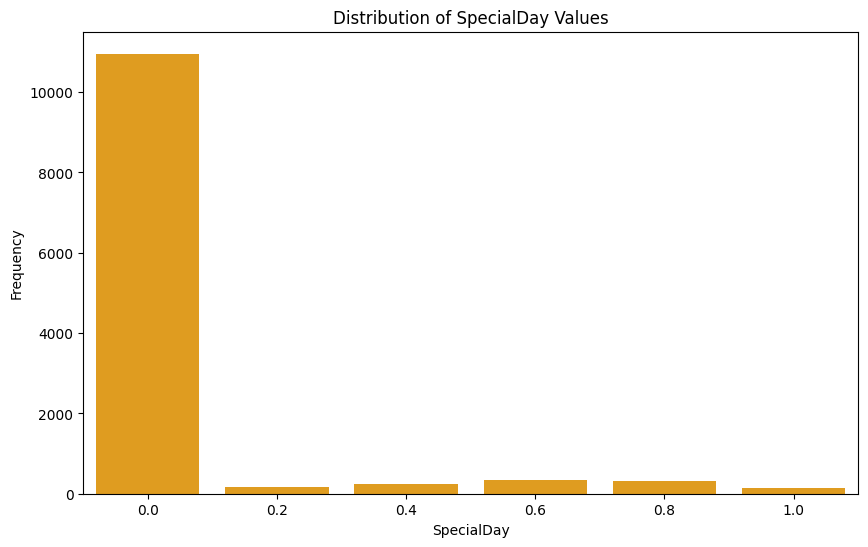

SpecialDay
0.0    0.167123
0.2    0.078652
0.4    0.053498
0.6    0.082857
0.8    0.033951
1.0    0.064935
Name: Revenue, dtype: float64


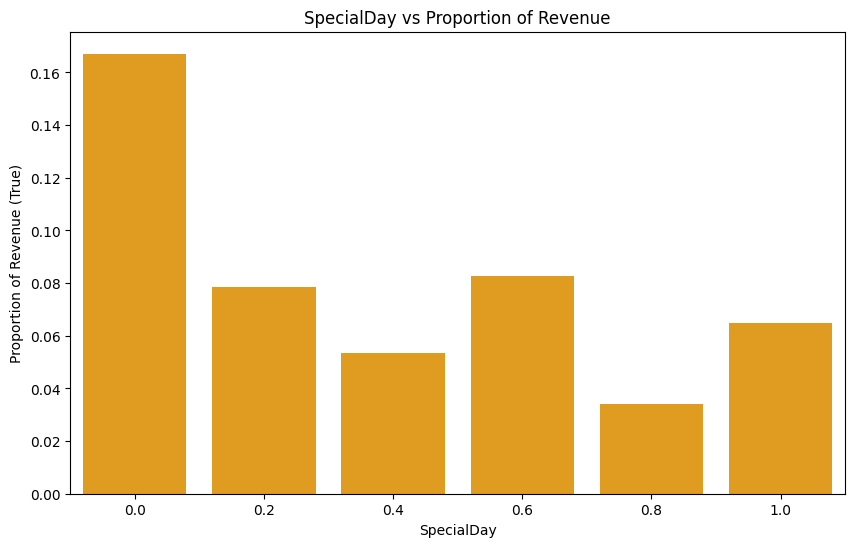

In [87]:
# Distribution of SpecialDay values
special_day_distribution = df['SpecialDay'].value_counts().sort_index()
print(special_day_distribution)

# Plotting the distribution of SpecialDay
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_distribution.index, y=special_day_distribution.values,color='orange')
plt.xlabel('SpecialDay')
plt.ylabel('Frequency')
plt.title('Distribution of SpecialDay Values')
plt.show()

# Correlation of SpecialDay with Revenue
special_day_revenue = df.groupby('SpecialDay')['Revenue'].mean()
print(special_day_revenue)

# Plotting SpecialDay vs Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_revenue.index, y=special_day_revenue.values,color='orange')
plt.xlabel('SpecialDay')
plt.ylabel('Proportion of Revenue (True)')
plt.title('SpecialDay vs Proportion of Revenue')
plt.show()


Obervations:

* SpecialDay category 0.0 have highest share with almost 90% of the data
* Proportion of Revenue (% of payment completed) on SpecialDay category 0.0 is highest with almost 17% followed by category 0.6 with almost 8% and then others
* High Frequency of 0.0 Values: This might suggest that a majority of sessions are not close to a special day, which is typical unless the analysis is done around peak special days.

**Chi-Square Test of Independence**

To check the correlation between SpecialDay and Revenue, a Chi-Square Test of Independence is appropriate because it can determine if there is a statistically significant association between the categorical variables SpecialDay and Revenue.

In [88]:
from scipy.stats import chi2_contingency

In [89]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['SpecialDay'], df['Revenue'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("\nChi-Square Test Results")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Step 3: Interpret the Results
alpha = 0.05  # significance level

if p < alpha:
    print("\nThere is a significant association between SpecialDay and Revenue (Reject H0).")
else:
    print("\nThere is no significant association between SpecialDay and Revenue (Fail to reject H0).")


Contingency Table:
Revenue     False  True 
SpecialDay              
0.0          9125   1831
0.2           164     14
0.4           230     13
0.6           321     29
0.8           313     11
1.0           144     10

Chi-Square Test Results
Chi2 Statistic: 98.17309947081253
P-Value: 1.2823078018486446e-19
Degrees of Freedom: 5
Expected Frequencies Table:
[[9243.25538714 1712.74461286]
 [ 150.17337157   27.82662843]
 [ 205.01196231   37.98803769]
 [ 295.28471938   54.71528062]
 [ 273.34928308   50.65071692]
 [ 129.92527653   24.07472347]]

There is a significant association between SpecialDay and Revenue (Reject H0).


**Conclusion:**

* Since the p-value is much lower than the significance level (α = 0.05), we reject the null hypothesis (H0), concluding that there is a statistically significant association between the SpecialDay feature and Revenue.
* This suggests that the likelihood of making a purchase is influenced by how close the site visiting time is to a special day. Specifically, people are more likely to make purchases as special days approach, even though the absolute number of sessions might decrease.


#Generate a binary feature indicating whether the user visited all three page categories.

In [90]:
# Create the binary feature indicating whether all three categories were visited
df['Visited_All_Three_Categories'] = (
    (df['Administrative'] > 0) &
    (df['Informational'] > 0) &
    (df['ProductRelated'] > 0)
).astype(int)

df[['Administrative', 'Informational', 'ProductRelated', 'Visited_All_Three_Categories']].head()


,Administrative,Informational,ProductRelated,Visited_All_Three_Categories
0,0,0,1,0
1,0,0,2,0
2,0,0,1,0
3,0,0,2,0
4,0,0,10,0


In [91]:
# Filter rows where the binary feature is 1
visited_all_three = df[df['Visited_All_Three_Categories'] == 1]

# Display the filtered rows
visited_all_three.shape

(2167, 19)

Observations:

There are 2167 visitors who have visited all three page categories

#Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region

We have already seen PageValues distribution and its insights earlier. Let's explore relationship with other features using following 3 ways:

1. Statistical Summary
2. Visualization (Box Plot)
3. Statistical Test (ANOVA)

#### PageValues Distribution and relationship with TrafficType

**Statistical Summary**

In [92]:
# Grouping by TrafficType and calculating mean, median, and std for PageValues
traffic_summary = df.groupby('TrafficType')['PageValues'].agg(['mean', 'median', 'std', 'count']).reset_index()

print(traffic_summary)


   TrafficType       mean    median        std  count
0            1   3.490649  0.000000  10.499142   2388
1            2   7.588827  0.000000  17.575513   3911
2            3   3.167508  0.000000  11.542836   2013
3            4   6.763565  0.000000  15.985008   1066
4            5   7.130860  0.000000  16.531843    260
5            6   5.026332  0.000000  13.558218    443
6            7  13.496191  0.423669  20.964350     40
7            8   8.357427  0.000000  19.617735    343
8            9   3.911694  0.000000  14.490910     41
9           10   5.765747  0.000000  15.663873    450
10          11   4.787385  0.000000  14.342716    247
11          12   0.000000  0.000000        NaN      1
12          13   2.244576  0.000000   8.930149    728
13          14   4.936097  0.000000  11.962463     13
14          15   0.037454  0.000000   0.227823     37
15          16   0.000000  0.000000   0.000000      3
16          17   0.000000  0.000000        NaN      1
17          18   0.000000  0

Observations:

* It is clearly observed that average of PageValues is different for each TrafficType.
* TrafficType 7 has the highest PageValues mean of 13.496 followed by TrafficType 20 with mean of 11.88

**Visualization (Box Plot)**

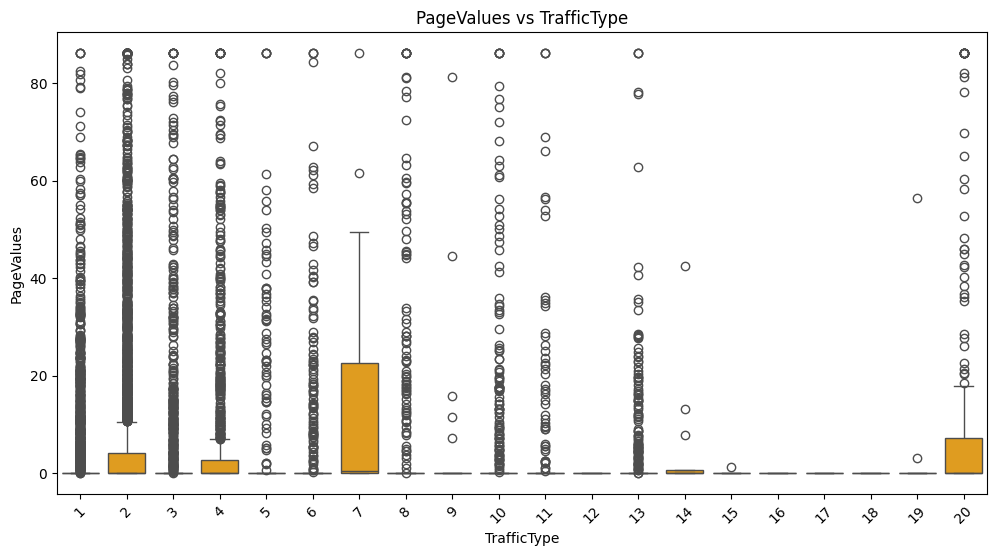

In [93]:
# Plotting PageValues against TrafficType
plt.figure(figsize=(12, 6))
sns.boxplot(x='TrafficType', y='PageValues', data=df, color='orange')
plt.xlabel('TrafficType')
plt.ylabel('PageValues')
plt.title('PageValues vs TrafficType')
plt.xticks(rotation=45)
plt.show()

From the above box plot it is clearly observed that distribution of PageValues for each TrafficType is different

**Statistical Test (ANOVA)**

In [94]:
from scipy import stats

In [95]:
# Performing ANOVA test to see if there's a significant difference in PageValues across TrafficType
# Extracting unique traffic types
traffic_types = df['TrafficType'].unique()

# Creating a list of PageValues lists, one for each traffic type
page_values_per_traffic_type = [df[df['TrafficType'] == traffic]['PageValues'].values for traffic in traffic_types]

# Performing ANOVA
f_stat, p_value = stats.f_oneway(*page_values_per_traffic_type)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")


ANOVA F-statistic: 15.173108830005013
ANOVA p-value: 2.2070843677934824e-49


A low p-value (e.g., < 0.05) suggests that at least one TrafficType category has a significantly different mean PageValues, indicating a meaningful relationship between the TrafficType and PageValues.

#### PageValues Distribution and relationship with VisitorType

**Summary Statistics**

In [96]:
visitor_summary = df.groupby('VisitorType')['PageValues'].agg(['mean', 'median', 'std', 'count']).reset_index()

print(visitor_summary)


         VisitorType       mean  median        std  count
0        New_Visitor   9.338849     0.0  20.851751   1693
1              Other  12.707296     0.0  28.380085     81
2  Returning_Visitor   4.816303     0.0  13.463881  10431


Observations:

* Visitor Type 'Other' has highest average of PageValues with mean of 12.7 followed by New_Visitor with mean of 9.33 and the Returning_Visitor with 4.8
* VisitorType 'Other' has highest Standard Deviation of 28.38 followed by New_Visitor std of 20.85 and Returning_Visitor 13.46

**Visualization (Violin Plot)**

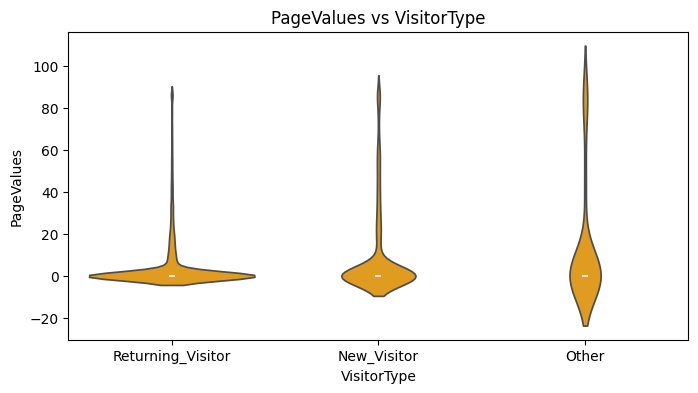

In [97]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='VisitorType', y='PageValues', data=df, color='orange')
plt.xlabel('VisitorType')
plt.ylabel('PageValues')
plt.title('PageValues vs VisitorType')
#plt.xticks(rotation=45)
plt.show()

Above Plot clearly shows how distribution of PageValues is different for each VisitorType

**Statistical Test (ANOVA)**

In [98]:
visitor_types = df['VisitorType'].unique()

# Creating a list of PageValues lists, one for each Visitor type
page_values_per_visitor_type = [df[df['VisitorType'] == visitor]['PageValues'].values for visitor in visitor_types]

# Performing ANOVA
f_stat, p_value = stats.f_oneway(*page_values_per_visitor_type)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")


ANOVA F-statistic: 77.16344282419132
ANOVA p-value: 4.994530733081246e-34


Since the p-value is significantly low, we can reject the null hypothesis, which means:

There are statistically significant differences in PageValues among different VisitorType categories.
This implies that whether a visitor is a new visitor, a returning visitor, or falls into another category significantly impacts the average value of the pages they visit.


#### PageValues Distribution and relationship with Region

**Summary Statistics**

In [99]:
region_summary = df.groupby('Region')['PageValues'].agg(['mean', 'median', 'std', 'count']).reset_index()

print(region_summary)


  Region      mean  median        std  count
0      1  5.601157     0.0  15.184818   4714
1      2  5.670295     0.0  14.768892   1128
2      3  4.984813     0.0  13.604897   2379
3      4  5.495913     0.0  14.780227   1171
4      5  7.774225     0.0  18.546806    318
5      6  4.605145     0.0  13.429405    801
6      7  5.827008     0.0  15.946901    758
7      8  3.730345     0.0  11.566530    431
8      9  7.522199     0.0  19.247556    505


Observations:

* Region 5 has the highest PageValue mean of 7.77 followed by Region 8 with mean of 7.52 and then Region 7 with 5.82
* Region 8 has the highest standard deviation of 19.24 followed by Region 4 with 18.54

**Visualization (Violin Plot)**

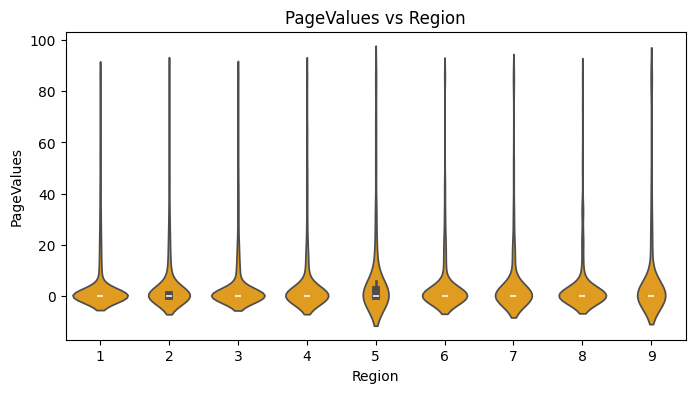

In [100]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='Region', y='PageValues', data=df, color='orange')
plt.xlabel('Region')
plt.ylabel('PageValues')
plt.title('PageValues vs Region')
#plt.xticks(rotation=45)
plt.show()

The Violin plot reveals that the distribution of each of the Region w.r.t PageValue is different

**Statistical Test (ANOVA)**

In [101]:
region_types = df['Region'].unique()

page_values_per_region = [df[df['Region'] == region]['PageValues'].values for region in region_types]

# Performing ANOVA
f_stat, p_value = stats.f_oneway(*page_values_per_region)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")


ANOVA F-statistic: 3.642081284892023
ANOVA p-value: 0.00030342236354568447


Since the p-value is well below 0.05, we reject the null hypothesis, which means:

There are statistically significant differences in PageValues among different Region categories.
This indicates that the average value of the pages visited differs by region, and this variation is unlikely to have occurred by random chance.

#Investigate user session lengths and their impact on conversion rates.

In [102]:
df['SessionLength'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

Check Distribution of Session Length

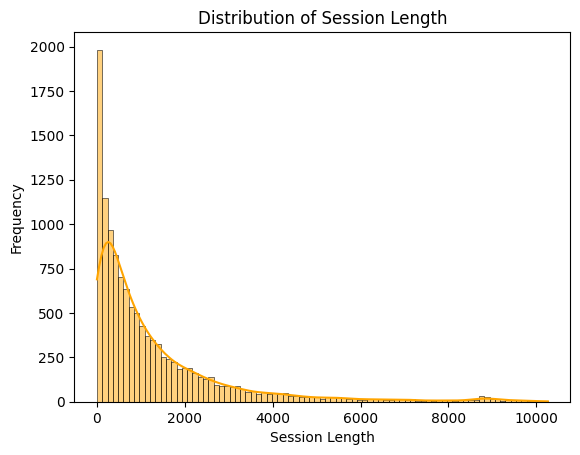

In [103]:
sns.histplot(df['SessionLength'], kde=True,color='orange')
plt.title('Distribution of Session Length')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
plt.show()

Creating Bins

In [104]:
bins = [0, 500, 1500, 2500, df['SessionLength'].max()]
labels = ['Short', 'Medium', 'Long', 'Very Long']
df['SessionLengthCategory'] = pd.cut(df['SessionLength'], bins=bins, labels=labels)

In [105]:
conversion_rate_by_length = df.groupby('SessionLengthCategory')['Revenue'].mean()
print(conversion_rate_by_length)

SessionLengthCategory
Short        0.082523
Medium       0.189969
Long         0.207487
Very Long    0.273398
Name: Revenue, dtype: float64


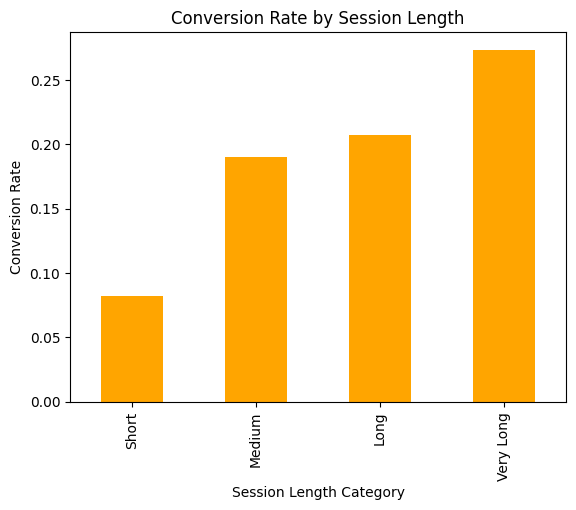

In [106]:
conversion_rate_by_length.plot(kind='bar',color='orange')
plt.title('Conversion Rate by Session Length')
plt.xlabel('Session Length Category')
plt.ylabel('Conversion Rate')
plt.show()

Observations:

* It is observed that as the session length increases conversion rate increases
* Very long session (2500+) has a conversion rate of 27.33% followed by Long session (1500-2500) rate of 20.7% , Medium session (500-1500) 18.9% and lastly short session (0-500) has 8.25%

#Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.

In [107]:
# Grouping by VisitorType, OperatingSystems, and Region
grouped_df = df.groupby(['VisitorType', 'OperatingSystems', 'Region']).agg(
    mean_page_value=('PageValues', 'mean'),
    conversion_rate=('Revenue', lambda x: x.mean() * 100),  # Conversion rate in percentage
    session_count=('Revenue', 'count')  # Number of sessions
).reset_index()

In [108]:
grouped_df

,VisitorType,OperatingSystems,Region,mean_page_value,conversion_rate,session_count
0,New_Visitor,1,1,9.974809,26.744186,172
1,New_Visitor,1,2,8.827076,34.146341,41
2,New_Visitor,1,3,4.806374,14.942529,87
3,New_Visitor,1,4,15.036554,29.729730,37
4,New_Visitor,1,5,25.747448,33.333333,6
...,...,...,...,...,...,...
211,Returning_Visitor,8,5,0.000000,0.000000,1
212,Returning_Visitor,8,6,0.000000,0.000000,1
213,Returning_Visitor,8,7,0.000000,0.000000,1
214,Returning_Visitor,8,8,NaN,NaN,0


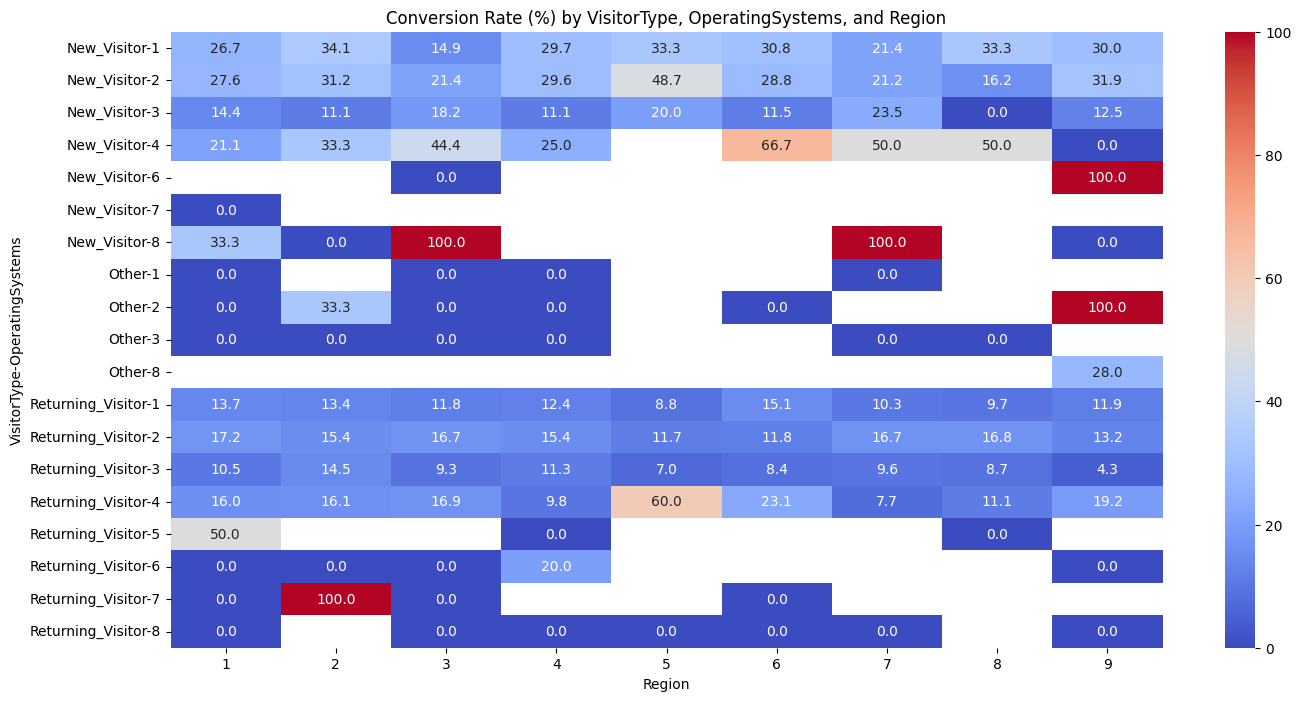

In [109]:
# Heatmap for Conversion Rate
plt.figure(figsize=(16, 8))
pivot_table = grouped_df.pivot_table(
    values='conversion_rate',
    index=['VisitorType', 'OperatingSystems'],
    columns='Region'
)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Conversion Rate (%) by VisitorType, OperatingSystems, and Region')
plt.show()

Observations:

* 100% Conversion Rate observed in the following combination:
    - Region 1, Returning Visitor, Opeating System 7
    - Region 9, Other, Operating System 2
    - Region 9, New Visitor, Operating System 6
    - Region 3, New Visitor, Operating System 8
    - Region 7, New Visitor, Operating System 8
* 66.7% Conversion Rate observed in case of Region 6, New Visitor, Operating System 4
* 60% Conversion Rate observed in case of Region 5, Returning Visitor, Operating System 4

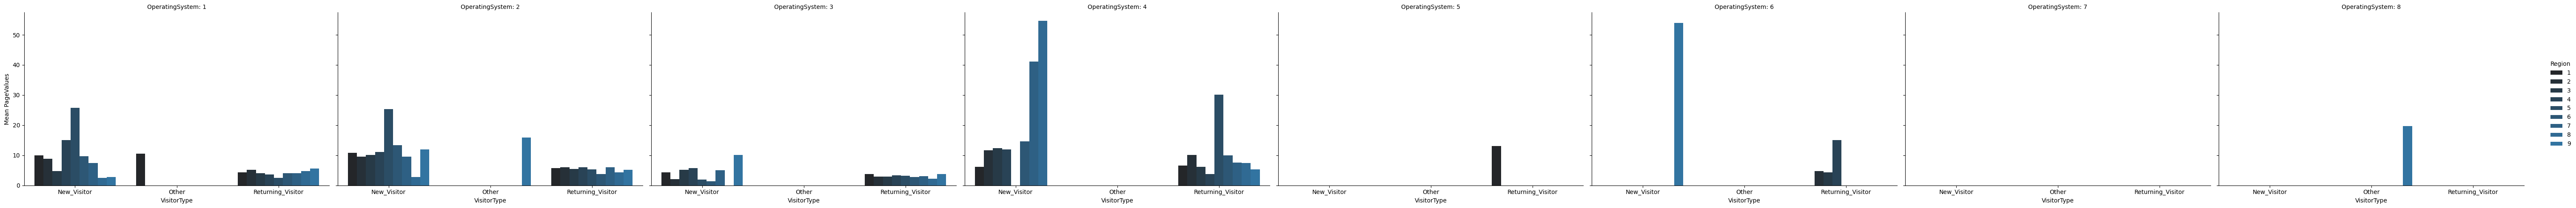

In [110]:
# Define a custom color palette
custom_palette = sns.color_palette("deep")

# Apply the custom palette
g = sns.FacetGrid(grouped_df, col="OperatingSystems", height=5, aspect=1.5, palette=custom_palette)
g.map_dataframe(sns.barplot, x="VisitorType", y="mean_page_value", hue="Region", ci=None)

g.set_axis_labels("VisitorType", "Mean PageValues")
g.add_legend(title='Region')
g.set_titles(col_template="OperatingSystem: {col_name}")

plt.show()


Above Graphs show variation in PageValue average w.r.t Visitor Type, Operating System and Region

#Segment users based on TrafficType and analyze their engagement patterns and purchase probability.

In [111]:
traffic_analysis = df.groupby('TrafficType').agg(
    mean_page_value=('PageValues', 'mean'),
    mean_bounce_rate=('BounceRates', 'mean'),
    mean_exit_rate=('ExitRates', 'mean'),
    conversion_rate=('Revenue', 'mean'),  # Conversion rate as the mean of Revenue (True/False)
    session_count=('Revenue', 'count')  # Total session count for each traffic type
).reset_index()

# Converting conversion rate to percentage
traffic_analysis['conversion_rate'] = traffic_analysis['conversion_rate'] * 100

In [112]:
traffic_analysis.sort_values(by='conversion_rate', ascending=False)

,TrafficType,mean_page_value,mean_bounce_rate,mean_exit_rate,conversion_rate,session_count
15,16,0.000000,0.000000,0.017998,33.333333,3
6,7,13.496191,0.007822,0.024818,30.000000,40
7,8,8.357427,0.011499,0.029639,27.696793,343
19,20,11.883117,0.023066,0.043599,25.906736,193
1,2,7.588827,0.008357,0.026303,21.656865,3911
4,5,7.130860,0.009451,0.029679,21.538462,260
9,10,5.765747,0.016633,0.037910,20.000000,450
10,11,4.787385,0.022210,0.043753,19.028340,247
3,4,6.763565,0.015744,0.035694,15.478424,1066
13,14,4.936097,0.002434,0.024006,15.384615,13


Observations:

* TrafficType 16 has the highest Conversion Rate of 33% with Mean PageValue and Mean Bounce Rate as 0, Mean Exit Rate at 1.8%, Total session counts 3
* TrafficType 7 is second highest with Conversion Rate of 30%, Mean PageValue 13.5, Mean Bounce Rate as 0.7%, Mean Exit Rate at 2.5%, Total session count at 40

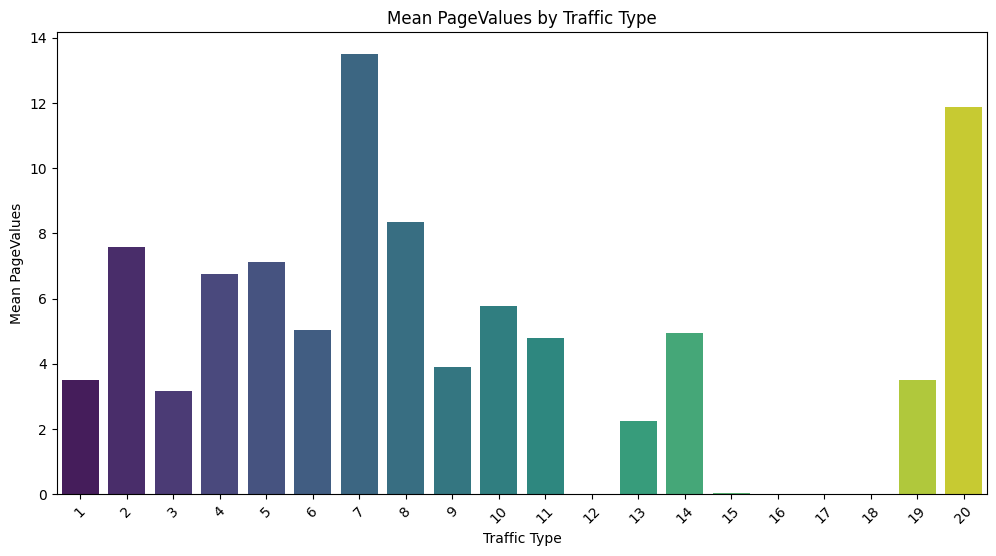

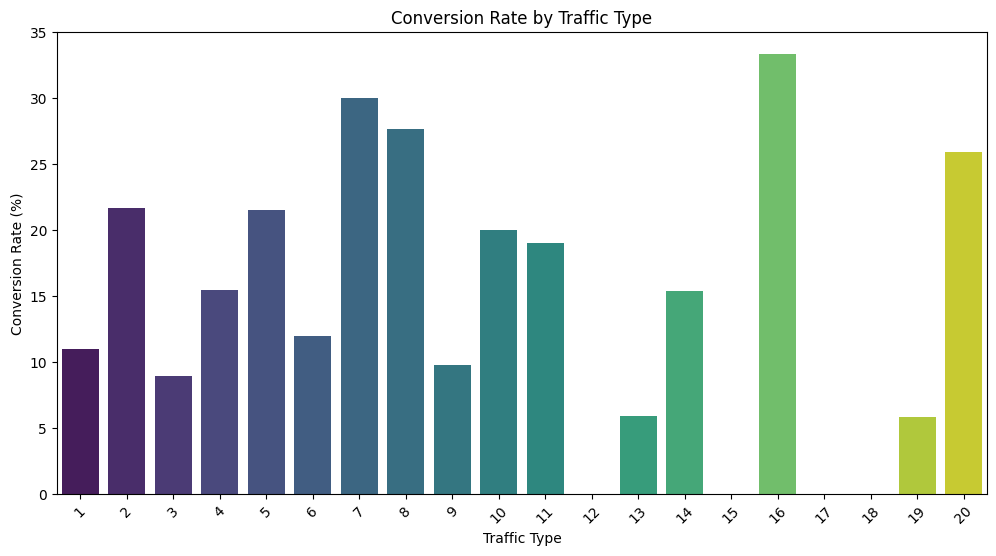

In [113]:
# Plotting mean_page_value by TrafficType
plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficType', y='mean_page_value', data=traffic_analysis, palette='viridis')
plt.xlabel('Traffic Type')
plt.ylabel('Mean PageValues')
plt.title('Mean PageValues by Traffic Type')
plt.xticks(rotation=45)
plt.show()

# Plotting conversion_rate by TrafficType
plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficType', y='conversion_rate', data=traffic_analysis, palette='viridis')
plt.xlabel('Traffic Type')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Traffic Type')
plt.xticks(rotation=45)
plt.show()

Observations:

* Mean PageValue is highest for TrafficType 7 followed by TrafficType 20
* Conversion Rate is highest for TrafficType 16 followed by TrafficType 7

#INSIGHTS



* SpecialDay 0.0 is the maximum with almost all entries with 0.0 and rest are negligible
* Month 'May' has got most of visitors followed by 'Nov' and 'March'
* Operating system 2 is the highest followed by 1 and 3
* Browser 2 has the maximum count followed by 1 and 4
* Most of the visitors are from Region 1 followed by 3 and 4
* Traffic type 2 has got maximum entries followed by 1 and 3
* Returning visitors are the highest with count above 10k followed by New_Visitor hardly 2k and negligible 'Other'
* Aboutt 70% sessions have occured on weekdays, not on weekends
* Almost 20% of the visitors completed the purchase
* % Visitors who completed the purchase on SpecialDay 0.0 are the highest
* November month has observed highest % i.e 30% of the visitors completed purchase followed by about 25% in October and about 20% in Spetember
* Almost 25% of the visitors using Operating system 8 completed the purchase followed by almost 20% using 2 and 4
* 30% of the visitors using Browser 12 and 13 are the ones completing purchase followed by 20% using 10 and 4 and 5
* There is no significant effect of Region on completion of purchase
* TrafficType 16 has highest number of visitors almost 35% completing the purchase followed by almost 30% visitors of 7 and 8
* 25% of the New Visitors complete the purchase followed by 20% of Other and 15% of Returning Visitors
* There is no significant effect of Weekend on purchase completion. With completed payments slightly higher on weekends.
* Maximum visitors did not visit any Administrative page, of which 10% of the visitors completed payment. As the number of administrative page are increasing the number of visitors are decreasing.  The fact that True Revenue has fewer instances but a wider range (larger IQR) suggests that when Revenue is True, the values of the numerical variable tend to be more varied, with a broader range of values. This could mean that while fewer customers (or instances) generate revenue, those that do may exhibit a broader spectrum of behaviors or characteristics.
* Similar obervation as above for Administrative Duration
* About 12% of the visitors completed the payment of the ones who did not visit any Informational page. As the number of such pages are increasing, the number of visits are decreasing. The greater spread in the box plot for True Revenue indicates higher variability among those instances where revenue is generated.
* Similar observation for Informational Duration i.e amount of time spent on these category of pages
* Maximum visitors have visited about 20 Product related pages of which about 17% have completed payment. Number of visitors reduces as the number of pages increase or decreases. A wider range or large IQR for when Revenue is True indicate that while fewer customers (or instances) generate revenue, those that do may exhibit a broader spectrum of behaviors or characteristics.
* Similar obervation or characteristics are observed for Product page duration
* Maximum visitors have got 0 Bounce Rate of which about 20% of the visitors completed payment
* Most of the visitors have shown an exit rate of about 1.25% of which about 27% of the visitors have completed payment
* The majority of pages (77.6%) have a PageValues of 0.0, indicating that these pages were part of sessions that did not lead to a conversion (purchase). The remaining values in PageValues, like 53.988, 42.293068, and 59.988, occur with very low frequency. These values represent pages that were part of sessions leading to conversions, with each value reflecting the contribution of the page to the revenue generated.
* Average of 2.3 Administrative pages visited with maximum of 14
* Average Time spent on Administrative pages is 77 with maximum of 839
* Average of 0.5 Informational pages visited with maximum of 6
* Average Time spent on Informational pages is 31 and maximum is 722
* Average of 31 product related pages visited and maximum is 221. And average time spent is 1164 and maximum is 8704
* Average Bounce Rate is 0.02 and maximum is 0.2
* Average Exit Rate is 0.04 and maximum is 0.2
* Average PageValue is 5.5 and maximum is 86
* Bounce Rates and Exit Rates show high positive correlation at 0.9
* Informational show positive correlation with ProductRelated and Administrative. Similarly for Duration of each of these types of pages
* PageValues show slight positive correlation to Administrative, ProductRelated and Informational and also to Administrative_Duration, Informational_Duration and ProductRelated_Duration
* Total Page Views is highest for Product Related at 379914 followed by Administrative at 28184 and then Informational
* Average Duration is highest for Product Related with 1164 followed by Administrative with 77 and then Information with 30
* Average Bounce Rate is highest for Product Related at 0.02 followed by Informational at 0.0084 and then Administrative at 0.0076
* Average Exit Rate is highest for ProductRelated with 0.041 followed by Informational at 0.024 and then Administrative at 0.023
* SpecialDay category 0.0 have highest share with almost 90% of the data
* Proportion of Revenue (% of payment completed) on SpecialDay category 0.0 is highest with almost 17% followed by category 0.6 with almost 8% and then others
* High Frequency of 0.0 Values: This might suggest that a majority of sessions are not close to a special day, which is typical unless the analysis is done around peak special days.
* There are 2167 visitors who have visited all three page categories
* TrafficType 7 has the highest PageValues mean of 13.496 followed by TrafficType 20 with mean of 11.88
* Visitor Type 'Other' has highest average of PageValues with mean of 12.7 followed by New_Visitor with mean of 9.33 and the Returning_Visitor with 4.8
* Region 5 has the highest PageValue mean of 7.77 followed by Region 8 with mean of 7.52 and then Region 7 with 5.82
* It is observed that as the session length increases conversion rate increases
* Very long session (2500+) has a conversion rate of 27.33% followed by Long session (1500-2500) rate of 20.7% , Medium session (500-1500) 18.9% and lastly short session (0-500) has 8.25%
* 100% Conversion Rate observed in the following combination:
    - Region 1, Returning Visitor, Opeating System 7
    - Region 9, Other, Operating System 2
    - Region 9, New Visitor, Operating System 6
    - Region 3, New Visitor, Operating System 8
    - Region 7, New Visitor, Operating System 8
* 66.7% Conversion Rate observed in case of Region 6, New Visitor, Operating System 4
* 60% Conversion Rate observed in case of Region 5, Returning Visitor, Operating System 4
* TrafficType 16 has the highest Conversion Rate of 33% with Mean PageValue and Mean Bounce Rate as 0, Mean Exit Rate at 1.8%, Total session counts 3
* TrafficType 7 is second highest with Conversion Rate of 30%, Mean PageValue 13.5, Mean Bounce Rate as 0.7%, Mean Exit Rate at 2.5%, Total session count at 40

#Recommendations

1. Leverage Special Days More Effectively
  
  **Observation:** Most of the data falls under SpecialDay category 0.0, with a relatively small portion indicating closeness to special days. However, the conversion rate is highest when users are visiting close to a special day.

  **Recommendation:** Increase marketing efforts and promotions leading up to special days. Create targeted campaigns and special offers around these days to capitalize on the higher likelihood of conversions. For instance, implementing countdown deals or time-sensitive discounts could create urgency and drive more purchases during this period.

2. Capitalize on High Traffic Months

  **Observation:** The months of May, November, and March have the highest visitor numbers, with November showing the highest conversion rates.

  **Recommendation:** Implement strategic promotions and marketing campaigns in these high-traffic months. This could include seasonal sales, exclusive product launches, or marketing partnerships to drive more traffic and maximize conversions. Additionally, preparing inventory and optimizing the website for high traffic during these months can ensure smooth user experience and increase sales.

3. Focus on Specific Operating Systems and Browsers

  **Observation:** Operating Systems 2, 1, and 3, and Browsers 2, 1, and 4 are the most used, but the highest conversion rates are observed with lesser-used browsers like 12, 13, and Operating Systems like 8.
  
  **Recommendation:** Optimize the website experience for the most used operating systems and browsers to ensure compatibility and speed. However, also focus on optimizing for the lesser-used OS and browsers that show high conversion rates. This might include tailored user experiences, exclusive offers, or personalized content to cater to users on these platforms.

4. Target Specific Traffic Types for Better Conversions

  **Observation:** TrafficType 2 has the highest number of visitors, but TrafficType 16, 7, and 8 show the highest conversion rates.

  **Recommendation:** While TrafficType 2 should be maintained as a high-volume traffic source, more targeted marketing campaigns should be directed at TrafficTypes 16, 7, and 8 due to their higher conversion rates. This could include specialized ads or content that resonates more with these users, potentially leading to higher engagement and conversion.
5. Optimize for Returning Visitors While Engaging New Visitors
  
  **Observation:** Returning visitors make up the majority of traffic, but new visitors show a higher conversion rate.
  
  **Recommendation:** Implement loyalty programs and personalized content for returning visitors to maintain their engagement. For new visitors, focus on impactful first-time experiences such as welcome discounts or easy onboarding processes. Consider using retargeting strategies to convert new visitors who didn’t purchase on their first visit.
6. Utilize Weekday and Weekend Patterns

  **Observation:** 70% of sessions occur on weekdays, but conversions are slightly higher on weekends.
  
  **Recommendation:** Schedule key promotions and email marketing campaigns to go live just before the weekends to leverage the higher conversion rates. Weekend-specific offers or flash sales can be introduced to attract more purchases from visitors during these times.
7. Reduce Bounce and Exit Rates

  **Observation:** Maximum visitors have a bounce rate of 0, but there is a high positive correlation between bounce rates and exit rates.
  
  **Recommendation:** Improve landing page content to ensure it meets user expectations and reduces the likelihood of bouncing. Enhance navigation and website speed to provide a seamless experience, encouraging users to stay longer and explore more. Implement exit-intent pop-ups to retain visitors who may otherwise leave.
8. Optimize Content and Pages for Product Engagement

  **Observation:** The majority of visitors visit around 20 product-related pages, with higher page views correlating with higher conversion rates.
  
  **Recommendation:** Ensure product pages are engaging, informative, and easy to navigate. Use high-quality images, detailed descriptions, customer reviews, and clear calls to action. Implement related product recommendations to encourage users to explore more items and increase page views and potential purchases.
9. Enhance Marketing Based on TrafficType and Visitor Insights

  **Observation:** TrafficType 16 and 7 show the highest conversion rates.
  
  **Recommendation:** Focus marketing efforts on acquiring more traffic from these sources. Understand the channels and strategies that bring in these types of traffic and invest more in those areas. Personalized marketing content that resonates with the behavior patterns of users from these traffic types could be more effective.
10. Segment Marketing by User Profile

  **Observation:** Users from different regions, operating systems, and visitor types have varying engagement and conversion patterns.
  
  **Recommendation:** Implement segmented marketing strategies based on user profiles. For instance, tailored promotions for different regions, customized experiences based on operating systems, and specific retargeting for visitor types. Use data analytics to continuously monitor and refine these segments to improve effectiveness.
11. Leverage Long Sessions for Higher Conversions

  **Observation:** Very long sessions have a higher conversion rate.

  **Recommendation:** Encourage users to spend more time on the site by providing engaging content, personalized recommendations, and interactive elements. Use tools like live chat support to keep users engaged and assist them in finding what they need, increasing the likelihood of conversion.

**Conclusion:**

These recommendations, grounded in the analysis of user behavior and engagement patterns, can guide strategies to enhance user experience, boost engagement, and increase conversion rates on the e-commerce platform. By focusing on optimizing special days, targeting high-conversion traffic types, and leveraging detailed user segmentation, the business can more effectively meet user needs and drive growth.